# Reading THEMIS ASI raw image data

Below we'll retrieve THEMIS ASI data, read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/stream0/2020/03/21/gill_themis19/ut06/20200321_0630_gill_themis19_full.pgm.gz"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20200321_0630_gill_themis19_full.pgm.gz"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import themis_imager_readfile

In [5]:
img, meta, problematic_files = themis_imager_readfile.read(filename)

In [6]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 256 x 256
Number of images: 20


In [7]:
# data for the first image
img[:,:,0]

array([[3463, 3537, 3464, ..., 3561, 3515, 3538],
       [3479, 3545, 3476, ..., 3542, 3536, 3539],
       [3483, 3548, 3484, ..., 3508, 3511, 3555],
       ...,
       [3484, 3528, 3498, ..., 3502, 3459, 3515],
       [3496, 3558, 3524, ..., 3486, 3475, 3521],
       [3515, 3551, 3530, ..., 3507, 3501, 3485]], dtype=uint16)

In [8]:
# metadata for first image
meta[0]

{'Revised': '2006-05-22',
 'Site unique ID': 'gill',
 'Imager unique ID': 'themis19',
 'Project unique ID': 'THEMIS',
 'Imager model': 'starlight Xpress MX716 with THEMIS all-sky optics',
 'Imager comment': 'Custom Helicopters',
 'Ccd type': 'Sony ICX249AL',
 'Ccd xsize': '752 pixels',
 'Ccd ysize': '290 pixels',
 'Ccd background': '3300',
 'Pixel depth': '16 bits',
 'Pixel aspect ratio': '0.5181',
 'Optical type': 'THEMIS all-sky',
 'Optical projection': 'a1=1.5,a3=0.0,b2=0.0,b4=0.0',
 'Optical center': 'x0=382,y0=150',
 'Computer name': 'gill i686',
 'Operating system': 'Linux 2.6.32-431.el6.i686 #1 SMP Fri Nov 22 00:26:36 UTC 2013',
 'Site name': 'Gillam',
 'Geodetic latitude': '56.3539',
 'Geodetic Longitude': '-94.6557',
 'Geodetic altitude': '0.0',
 'NTP target': '192.168.0.1',
 'NTP delay': '0.276',
 'NTP offset': '-25.490',
 'NTP jitter': '13.736',
 'Mode unique ID': 'full',
 'Mode sequence number': '5616',
 'CCD device': '/dev/ccdA',
 'Exposure options': 'WIDTH=512 HEIGHT=256 

## Visualize the image

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

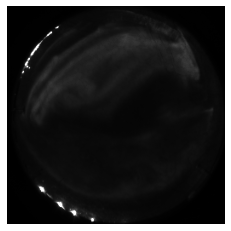

In [10]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

In [11]:
# Pulled from SciPy. This function was depreated in 
# scipy v1.2.0, but it's quite useful for us.
import numpy as np
def bytescale(data, cmin=None, cmax=None, high=65535, low=0):
    if high > 65535:
        raise ValueError("`high` should be less than or equal to 65535.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint16)

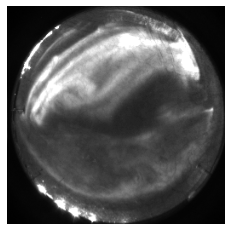

In [18]:
# scale the image with 3000 as the floor and 14000 as the ceiling, then display
im_scaled = bytescale(img[:,:,0], cmin=3000, cmax=14000)
plt.imshow(im_scaled, cmap="gray")
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [19]:
# remove the downloaded files
import os
os.remove(filename)